In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

2025-07-16 17:49:32.299081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752688172.549691      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752688172.622359      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


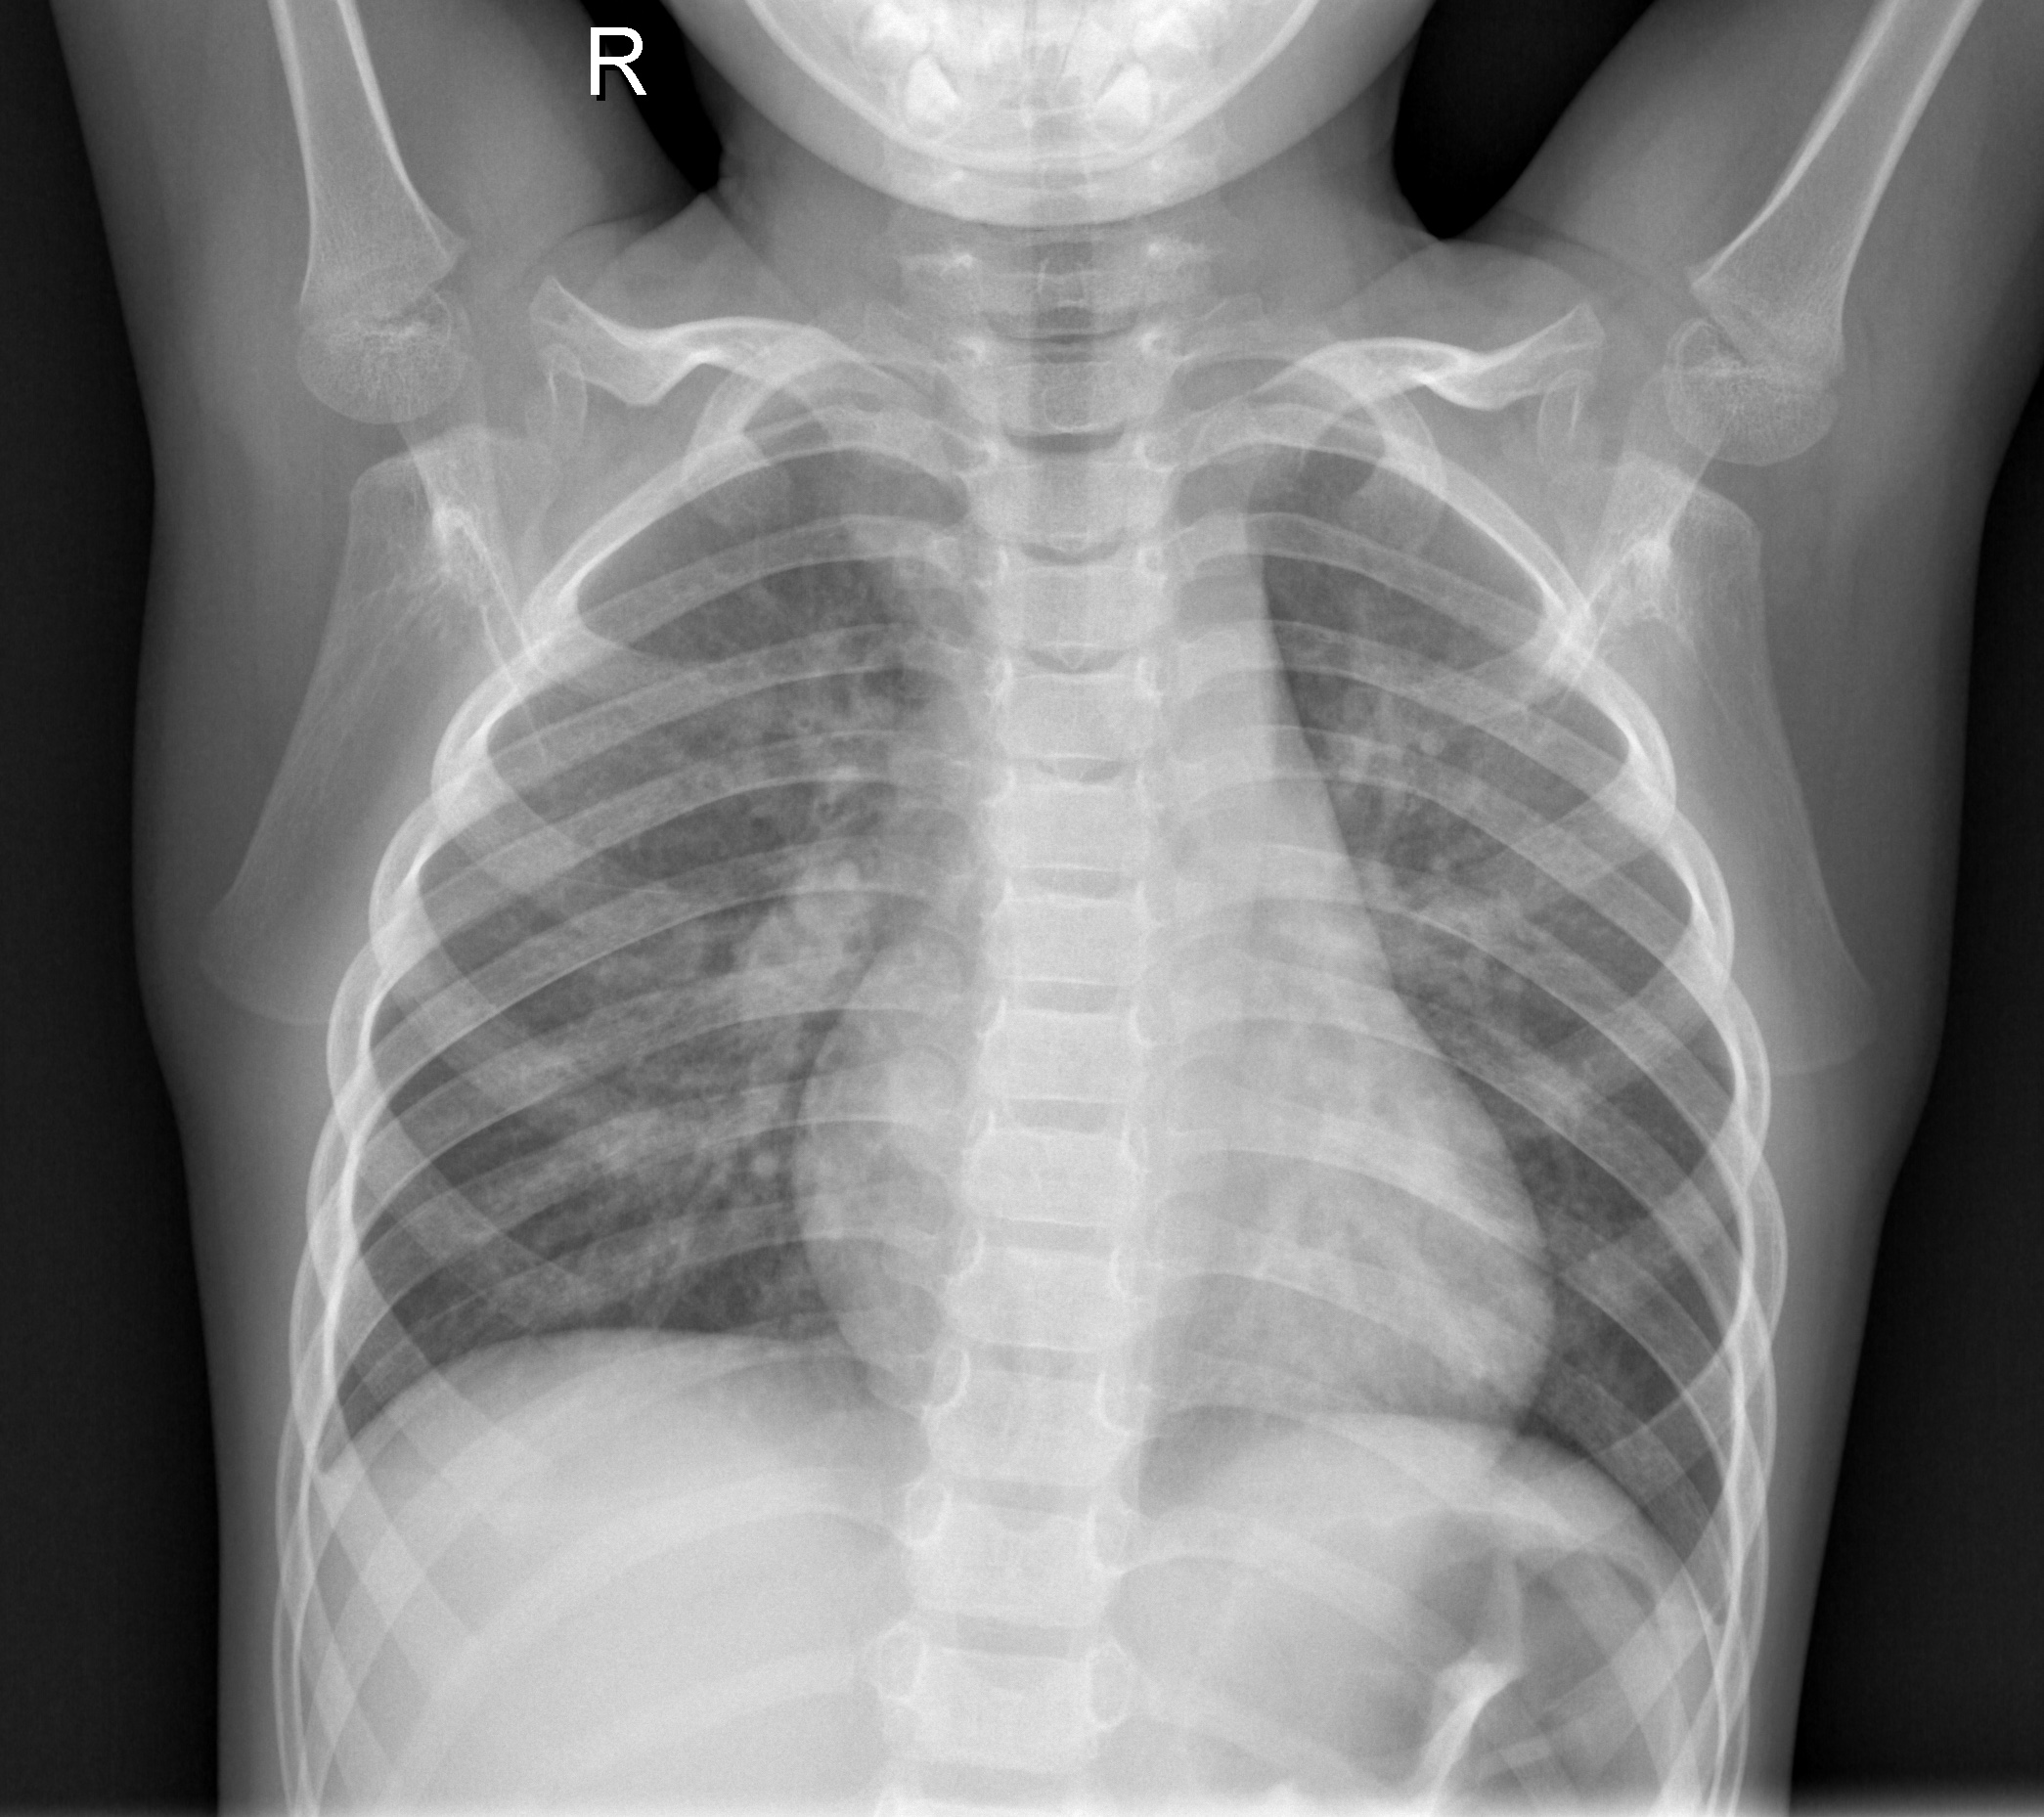

In [3]:
image_normal = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
image_normal

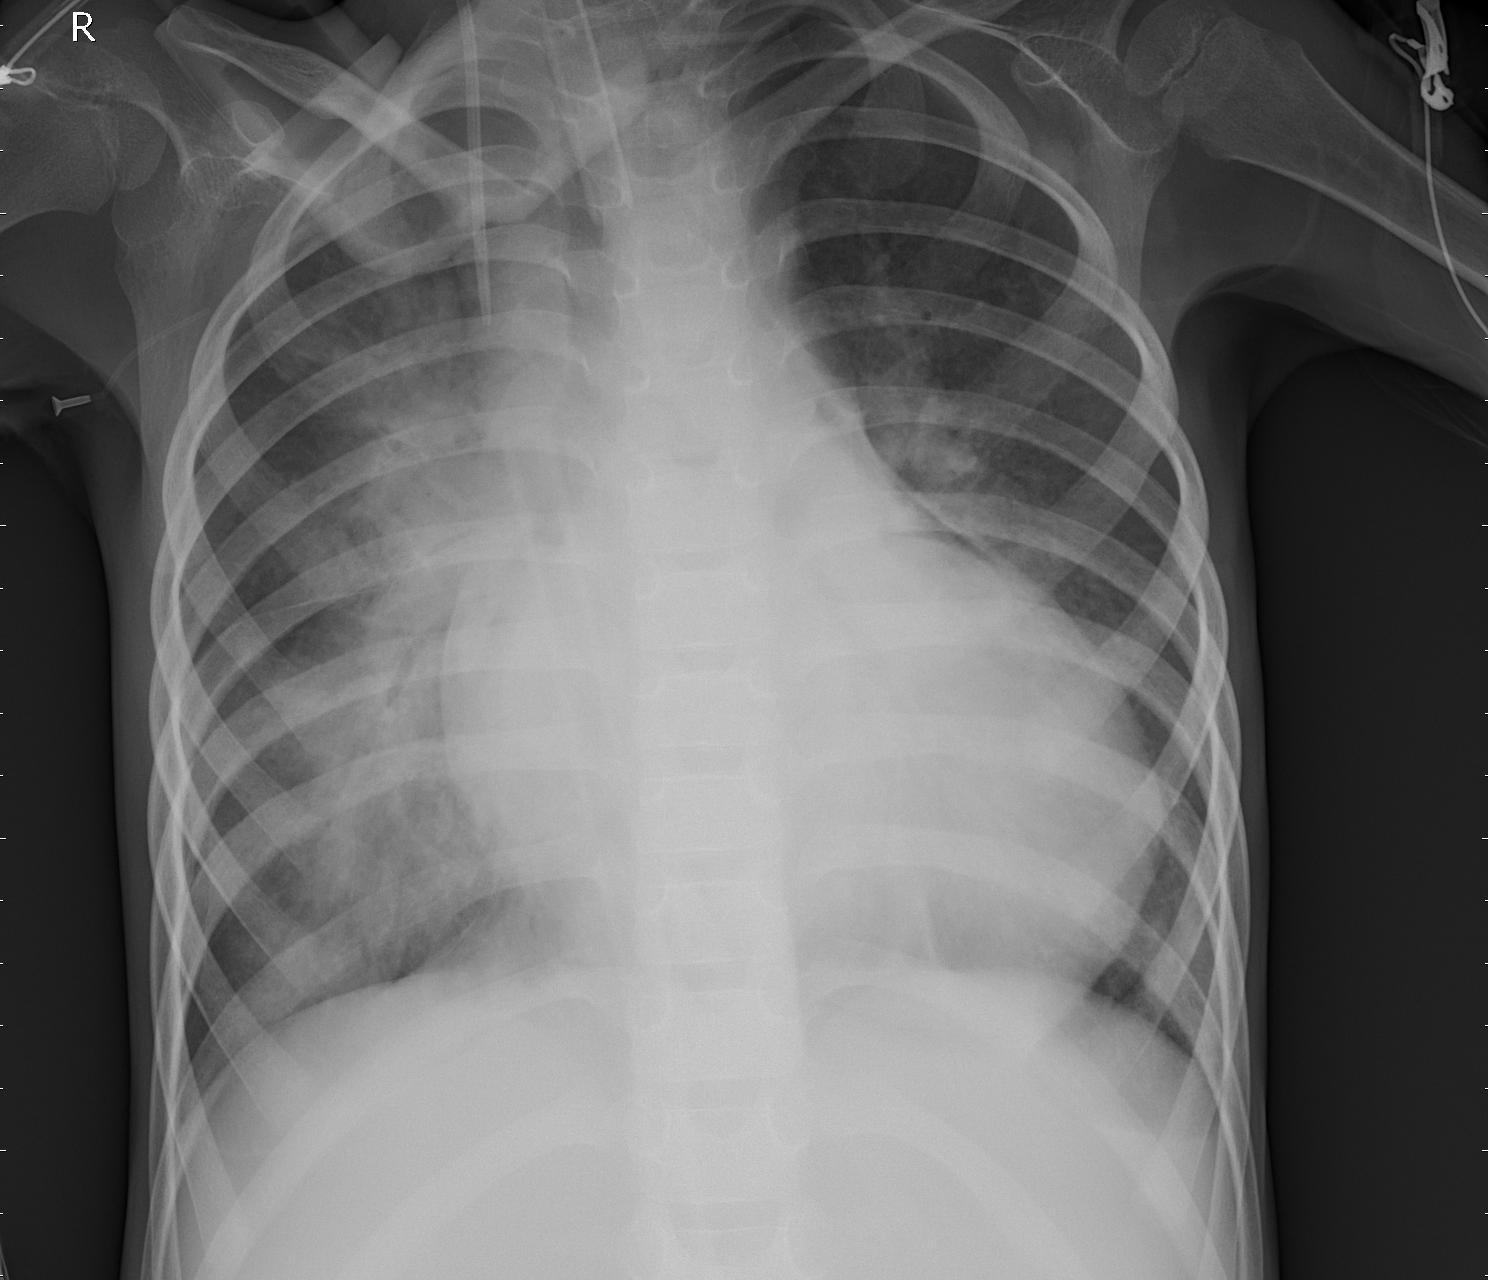

In [4]:
image_bacteria = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1003_bacteria_2934.jpeg")
image_bacteria

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
training_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"

training_generator = ImageDataGenerator(rescale=1/255)

data_train = training_generator.flow_from_directory(training_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [7]:
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

test_generator = ImageDataGenerator(rescale=1/255)

data_test = test_generator.flow_from_directory(test_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 624 images belonging to 2 classes.


In [8]:
valid_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"

valid_generator = ImageDataGenerator(rescale=1/255)

data_valid = valid_generator.flow_from_directory(valid_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 16 images belonging to 2 classes.


**CONVOLUTIONAL NEURAL NETWORKS**

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-16 17:50:19.804913: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,700,161 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [12]:
history = model.fit(data_train, epochs=5, validation_data=data_valid)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 130s 192ms/step - acc: 0.7382 - loss: 0.5890 - val_acc: 0.5625 - val_loss: 1.5073
Epoch 2/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 111s 170ms/step - acc: 0.8743 - loss: 0.2858 - val_acc: 0.8750 - val_loss: 0.2887
Epoch 3/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 109s 168ms/step - acc: 0.9204 - loss: 0.1848 - val_acc: 0.6875 - val_loss: 1.0757
Epoch 4/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 109s 166ms/step - acc: 0.9485 - loss: 0.1298 - val_acc: 0.6875 - val_loss: 0.7554
Epoch 5/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 109s 168ms/step - acc: 0.9642 - loss: 0.0789 - val_acc: 0.8750 - val_loss: 0.3909


In [13]:
model.evaluate(data_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - acc: 0.8194 - loss: 0.7186


[0.7268471121788025, 0.8205128312110901]

In [14]:
predictions=model.predict(data_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step


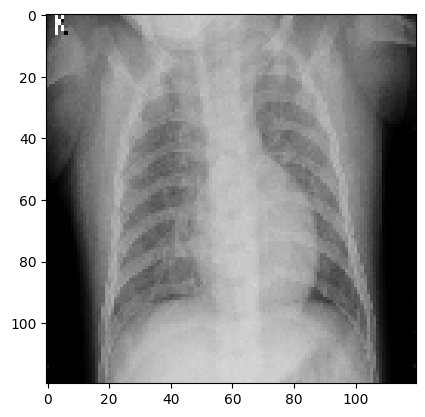

Probabilty of pneumonia 0.9999633


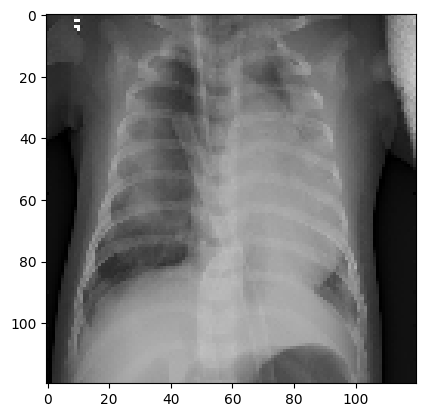

Probabilty of pneumonia 0.9998772


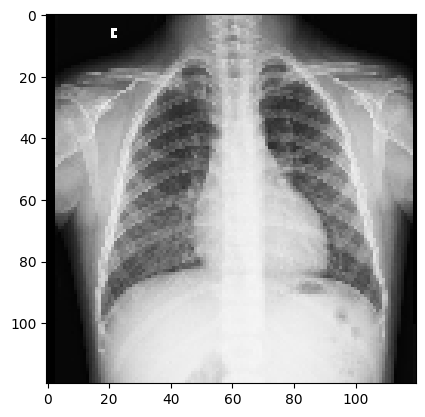

Probabilty of pneumonia 0.9999525


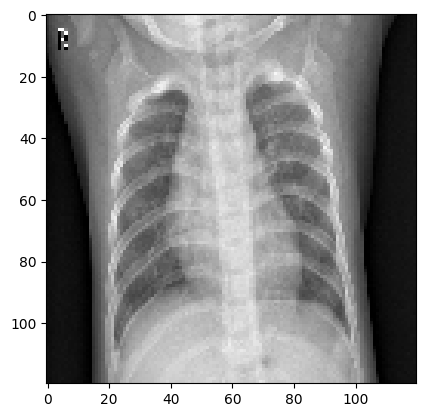

Probabilty of pneumonia 0.99998


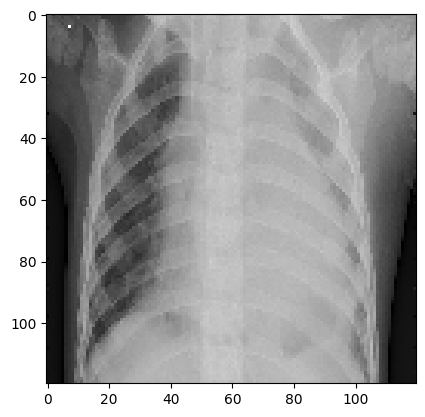

Probabilty of pneumonia 0.9791006


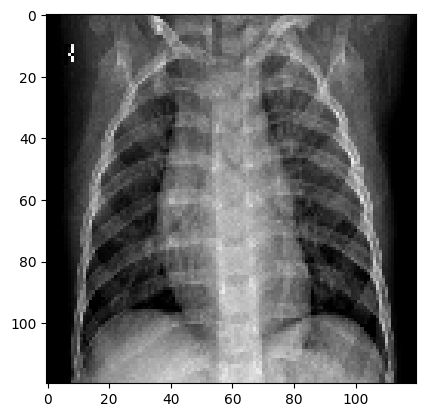

Probabilty of pneumonia 0.99997693


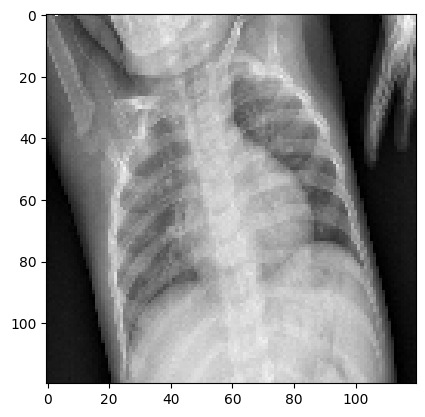

Probabilty of pneumonia 0.99733007


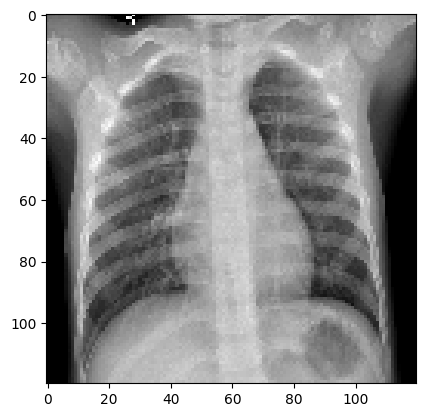

Probabilty of pneumonia 0.25216442


In [15]:
images, labels = next(data_test)

for j in range(len(images)):
    plt.imshow(images[j])
    plt.show()
    print("Probabilty of pneumonia",predictions[j][0])